# 추천 시스템 이해 - Apriori , FP-Growth

### 추천시스템 분석 입문 (토큰 on 세미나)

#### https://www.youtube.com/playlist?list=PL9mhQYIlKEhdkOVTZWJJIy8rv6rQaZNNc 

In [1]:
import mlxtend
import numpy as np
import pandas as pd

In [2]:
data = np.array([
    ['우유', '기저귀', '쥬스'],
    ['양상추', '기저귀', '맥주'],
    ['우유', '양상추', '기저귀', '맥주'],
    ['양상추', '맥주']
])

C:\Users\user\AppData\Local\Temp\ipykernel_19568\3354202648.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  data = np.array([


In [3]:
data

array([list(['우유', '기저귀', '쥬스']), list(['양상추', '기저귀', '맥주']),
       list(['우유', '양상추', '기저귀', '맥주']), list(['양상추', '맥주'])],
      dtype=object)

### 연관 분석 : 상품과 상품 사이에 어떤 연관이 있는지 찾아내는 알고리즘 

#### 1. 얼마나 같이 구매하는가
#### 2. A 아이템을 구매하는 사람이 B 아이템을 구매하는가


#### 관련 평가 지표 : Support(지지도) , Lift(향상도), Confidence(신뢰도)

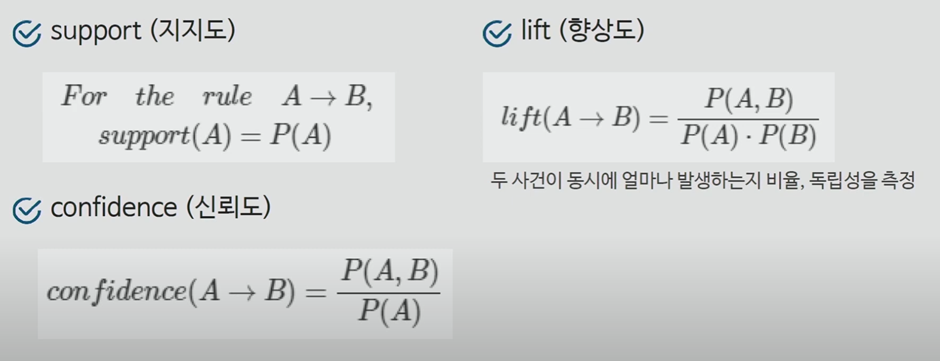
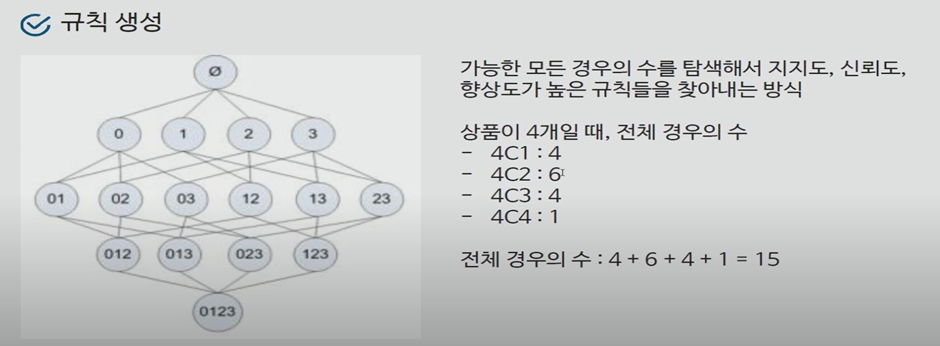

## Apriori 알고리즘

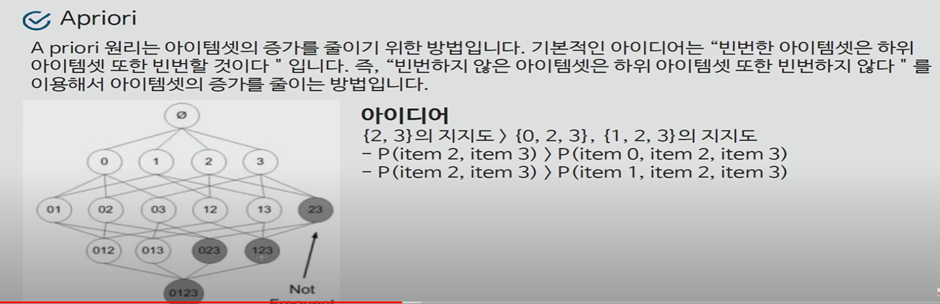

In [4]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [5]:
%%time
from mlxtend.frequent_patterns import apriori

apriori(df, min_support=0.5, use_colnames=True)

Wall time: 8.65 ms


,support,itemsets
0,0.75,(기저귀)
1,0.75,(맥주)
2,0.75,(양상추)
3,0.50,(우유)
4,0.50,"(기저귀, 맥주)"
5,0.50,"(기저귀, 양상추)"
6,0.50,"(우유, 기저귀)"
7,0.75,"(맥주, 양상추)"
8,0.50,"(기저귀, 맥주, 양상추)"


## FP-Growth 알고리즘

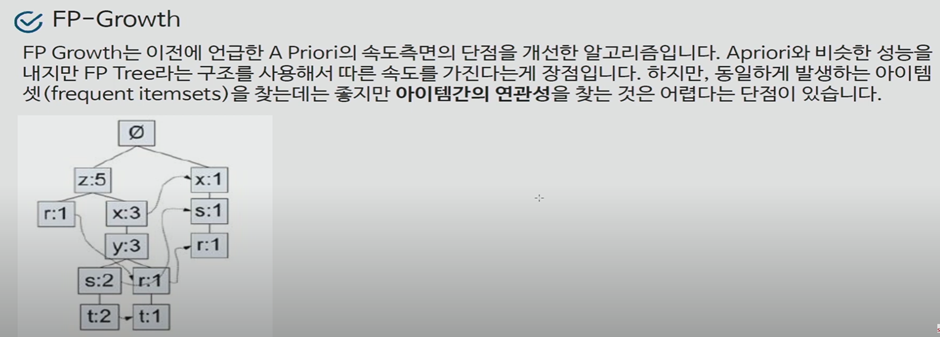

In [6]:
from mlxtend.preprocessing import TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(data).transform(data)
df = pd.DataFrame(te_ary, columns=te.columns_)
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [7]:
%%time
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.frequent_patterns import association_rules


fpgrowth(df, min_support=0.5, use_colnames=True)

Wall time: 999 µs


,support,itemsets
0,0.75,(기저귀)
1,0.50,(우유)
2,0.75,(양상추)
3,0.75,(맥주)
4,0.50,"(기저귀, 맥주)"
5,0.50,"(기저귀, 양상추)"
6,0.50,"(기저귀, 맥주, 양상추)"
7,0.50,"(우유, 기저귀)"
8,0.75,"(맥주, 양상추)"


In [8]:
df

,기저귀,맥주,양상추,우유,쥬스
0,True,False,False,True,True
1,True,True,True,False,False
2,True,True,True,True,False
3,False,True,True,False,False


In [9]:
association = fpgrowth(df, min_support=0.1, use_colnames=True)

# suport , confidence , lift 확인
association_rules(association, metric = 'confidence', min_threshold = 0.5, support_only =False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(기저귀),(맥주),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
1,(맥주),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
2,(기저귀),(양상추),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
3,(양상추),(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
4,"(기저귀, 맥주)",(양상추),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
5,"(기저귀, 양상추)",(맥주),0.50,0.75,0.50,1.000000,1.333333,0.1250,inf,0.500000
6,"(맥주, 양상추)",(기저귀),0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
7,(기저귀),"(맥주, 양상추)",0.75,0.75,0.50,0.666667,0.888889,-0.0625,0.75,-0.333333
8,(맥주),"(기저귀, 양상추)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50,1.000000
9,(양상추),"(기저귀, 맥주)",0.75,0.50,0.50,0.666667,1.333333,0.1250,1.50,1.000000
